# 01 - Introduction To Causality


## Why Bother?

First and foremost, you might be wondering: what's in it for me? Here is what:

## Data Science is Not What it Used to Be (or it Finally Is)

Data Scientist has been labeled [The Sexiest Job of the 21st Century](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century) by Harvard Business Review. This was no empty statement. For a decade now, Data Scientist has been in the spotlight. AI experts had [salaries that rivaled those of sports superstars](https://www.economist.com/business/2016/04/02/million-dollar-babies). In the search for fame and fortune, hundreds of young professionals entered into what seemed a frenetic golden rush to get the Data Science title as quickly as possible. Whole new industries sprang around the hype. Miraculous teaching methods could make you a Data Scientist without requiring you to look at a single math formula. Consulting specialists promised millions if your company could unlock the potential of data. AI, or Machine Learning, has been called the new electricity and data, the new oil. 

During all this time, economists were trying to answer what is the true impact of education on one’s earnings, biostatisticians were trying to understand if saturated fat led to a higher chance of heart attack, and psychologists were trying to understand if words of affirmation led indeed to a happier marriage. Meanwhile, we forgot about those who have been doing “old-fashioned” science with data all along. If we were to be completely honest, data science is not a recent field. We are simply aware of it just now due to the massive amount of free marketing the media has provided.

To use a Jim Collins analogy, think about pouring yourself an ice-cold cup of your favorite beer. If you do this the right way, most cups will be beer, but there will be a 1 finger thick layer of foam at the top. This cup is just like Data Science. 

1. It's the beer. The statistical foundations, the scientific curiosity, the passion for complex problems. All of this was proven very valuable for hundreds of years.
2. It's the foam. The fluffy stuff is built on unrealistic expectations that will eventually go away.

This foam might come down crashing faster than you think. As The Economist puts it

> The same consultants who predict that AI will have a world-altering impact also report that real managers in real companies are finding AI hard to implement, and that enthusiasm for it is cooling. Svetlana Sicular of Gartner, a research firm, says that 2020 could be the year AI falls onto the downslope of her firm’s well-publicised “hype cycle”. Investors are beginning to wake up to bandwagon-jumping: a survey of European AI startups by MMC, a venture-capital fund, found that 40% did not seem to be using any AI at all.

What should we, as Data Scientists - or better yet, as “just” Scientists - do during all this craze? If you are smart, you will learn to ignore the foam as a starter. We are in it for the beer. Math and statistics have been helpful forever, and it is unlikely it will stop now. Second, learn what makes your work valuable and valuable, not the latest shining tool that no one figured out how to use.

Last but not least, remember that there are no shortcuts. Knowledge in Math and Statistics is valuable precisely because they are hard to acquire. If everyone could do it, excess supply would drive its price down. So **toughen up**! Learn them as well as you can. And heck, why not? Have fun along the way as we embark on this quest only **for the Brave and True**.

![img](./data/img/intro/tougher-up-cupcake1.jpg)

## Answering a Different Kind of Question

Machine Learning is currently very good at answering the type of question of the prediction kind. As Ajay Agrawal, Joshua Gans, and Avi Goldfarb put it in the book Prediction Machines, "the new wave of artificial intelligence does not actually bring us intelligence but instead a critical component of intelligence - prediction". We can do all sorts of beautiful things with machine learning. The only requirement is that we frame our problems as prediction ones. Want to translate from English to Portuguese? Then build an ML model that predicts Portuguese sentences when given English sentences. Want to recognize faces? Then create an ML model that predicts the presence of a face in a subsection of a picture. Want to build a self-driving car? Then make one ML model to predict the direction of the wheel and the pressure on the brakes and accelerator when presented with images and sensors from the surroundings of a car.

However, ML is not a panacea. It can perform wonders under rigid boundaries and still fail miserably if its data deviates a little from what the model is accustomed to. To give another example from Prediction Machines, "in many industries, low prices are associated with low sales. For example, in the hotel industry, prices are low outside the tourist season, and prices are high when demand is highest and hotels are full. Given that data, a naive prediction might suggest that increasing the price would lead to more rooms sold." 

ML is notoriously bad at this inverse causality type of problem. They require us to answer "what if" questions, which economists call counterfactuals. What would happen if I used another price instead of this price I'm currently asking for my merchandise? What would happen if I do a low sugar one instead of this low-fat diet I'm in? If you work in a bank, giving credit, you will have to figure out how changing the customer line changes your revenue. Or, if you work in the local government, you might be asked to figure out how to make the schooling system better. Should you give tablets to every kid because the era of digital knowledge tells you to? Or should you build an old-fashioned library? 

At the heart of these questions, there is a causal inquiry we wish to know the answer to. Causal questions permeate everyday problems, like figuring out how to make sales go up. Still, they also play an essential role in dilemmas that are very personal and dear to us: do I have to go to an expensive school to be successful in life (does education cause earnings)? Does immigration lower my chances of getting a job (does immigration causes unemployment to go up)? Does money transfer to the poor lower the crime rate? It doesn't matter the field you are in. It is very likely you had or will have to answer some type of causal question. Unfortunately for ML, we can't rely on correlation-type predictions to tackle them.

Answering this kind of question is more challenging than most people appreciate. Your parents have probably repeated to you that "association is not causation", "association is not causation". But actually, explaining why that is the case is a bit more involved. This is what this introduction to causal inference is all about. As for the rest of this book, it will be dedicated to **figuring out how to make association be causation**.

## When Association IS Causation

Intuitively, we kind of know why the association is not causation. If someone tells you that schools that give tablets to their students perform better than those that don’t, you can quickly point out that it is probably the case that those schools with the tablets are wealthier. As such, they would do better than average even without the tablets. Because of this, we can’t conclude that giving tablets to kids during classes will cause an increase in their academic performance. We can only say that tablets in school are associated with high academic performance, as measured by ENEM (sort of the SAT in Brazil, which stands for National High School Exam):

In [2]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [3]:
style.use("fivethirtyeight")

np.random.seed(123)
n = 100
tuition = np.random.normal(1000, 300, n).round()
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

In [4]:
data.columns

Index(['enem_score', 'Tuition', 'Tablet'], dtype='object')

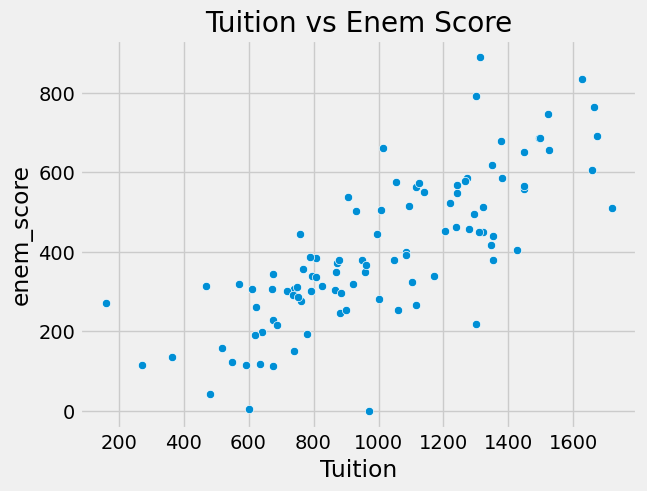

In [5]:
plt.title('Tuition vs Enem Score')
sns.scatterplot(data=data, x='Tuition', y='enem_score')
plt.show()

In [6]:
# Fit a Regression model to see linear tendency
from sklearn.linear_model import LinearRegression 

In [7]:
lm = LinearRegression()
lm.fit(data[['enem_score']], data[['Tuition']])
data['predicted_tuition'] = lm.predict(np.array(data['enem_score']).reshape(-1, 1))

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Let's visualize if there's an evident Linear Tendecy

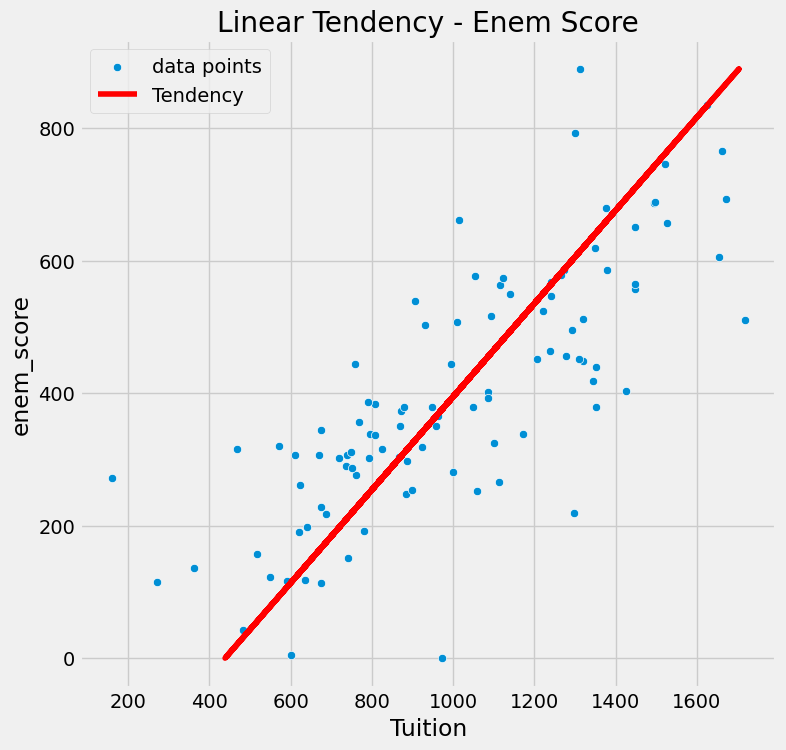

In [8]:
plt.figure(figsize=(8, 8))
plt.title('Linear Tendency - Enem Score')
sns.scatterplot(data=data, x='Tuition', y='enem_score', label='data points')
plt.plot(data['predicted_tuition'], data['enem_score'], color='r', label='Tendency')
plt.legend()
plt.show()

Now visualize how the enem score and exam tuition relate considering those High Schools with tablets and those that do not 

In [9]:
data['tablet_label'] = data['Tablet'].map({
    True: "School w Tablets",
    False: "Schools w/o Tablets"
})

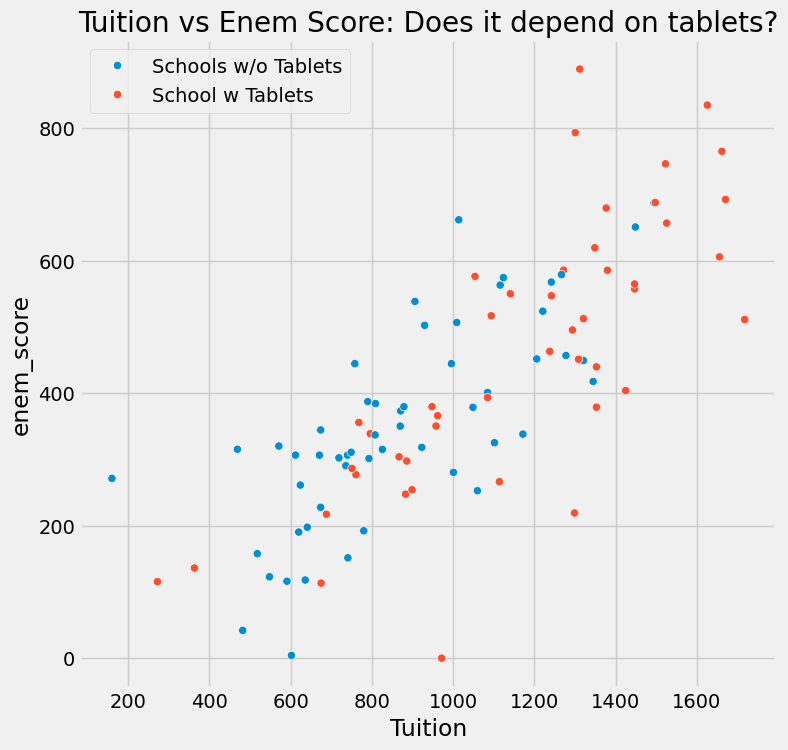

In [10]:
plt.figure(figsize=(8, 8))
plt.title('Tuition vs Enem Score: Does it depend on tablets?')
sns.scatterplot(data=data, x='Tuition', y='enem_score', hue='tablet_label')
plt.legend()
plt.show()

Apparently, there's no evident difference between those schools with Tablets and those that does without, let's fit a Linear Model to see the relation between the Enem Score and the Tuition 

In [11]:
plt.figure(figsize=(8, 8))
# Visualize Enem Score and Tuition relation dividing between Schools with and without tablets

plt.plot(
    data_tablets["predicted_tuition|has tablet"],
    data_tablets["enem_score"],
    label="Schools w Tablets",  # Correct label for schools with tablets
    linestyle="--",
    linewidth=0.4
)
    
plt.plot(
    data_no_tablets["predicted_tuition|has no tablet"],
    data_no_tablets["enem_score"],
    label="Schools w/o Tablets",  # Correct label for schools without tablets
    linestyle="--",
    linewidth=0.4
)

plt.title('Enem Score vs Tuition: Does it depend on tablets?')
sns.scatterplot(data=data, x="Tuition", y="enem_score", hue="tablet_label")

plt.legend()
plt.show()

NameError: name 'data_tablets' is not defined

<Figure size 800x800 with 0 Axes>

I observe there is a slight difference in the tendencies, it might be due to the number of samples, or to noise in the data, but it is also probable that the Enem Score is also affected positively by the implementation of tablets. 

In [ ]:
plt.figure(figsize=(6,8))
sns.boxplot(y="enem_score", x="Tablet", data=data).set_title('ENEM score by Tablet in Class')
plt.show()

To get beyond simple intuition, let's first establish some notation. This will be our everyday language to speak about causality. Think of it as the common tongue we will use to identify other brave and true causal warriors, and that will compose our cry in the many battles to come.

Let's call $T_i$ the treatment intake for unit i. 

$
T_i=\begin{cases}
1 \ \text{if unit i received the treatment}\\
0 \ \text{otherwise}\\
\end{cases}
$

The treatment here doesn't need to be a medicine or anything from the medical field. Instead, it is just a term we will use to denote some intervention for which we want to know the effect. In our case, the treatment is giving tablets to students. As a side note, you might sometimes see $D$ instead of $T$ to denote the treatment.

Now, let's call $Y_i$ the observed outcome variable for unit i.

The outcome is our variable of interest. We want to know if the treatment has any influence in it. In our tablet example, it would be the academic performance.

Here is where things get interesting. The **fundamental problem of causal inference** is that we can never observe the same unit with and without treatment. It is as if we have two diverging roads and we can only know what lies ahead of the one we take. As in Robert Frost poem:

>Two roads diverged in a yellow wood,  
And sorry I could not travel both  
And be one traveler, long I stood  
And looked down one as far as I could  
To where it bent in the undergrowth;  


To wrap our heads around this, we will talk a lot in term of **potential outcomes**. They are potential because they didn't actually happen. Instead they denote **what would have happened** in the case some treatment was taken. We sometimes call the potential outcome that happened, factual, and the one that didn't happen, counterfactual.

As for the notation, we use an additional subscript:

$Y_{0i}$ is the potential outcome for unit i without the treatment. 

$Y_{1i}$ is the potential outcome for **the same** unit i with the treatment.

Sometimes you might see potential outcomes represented as functions $Y_i(t)$, so beware. $Y_{0i}$ could be $Y_i(0)$ and $Y_{1i}$ could be $Y_i(1)$. Here, we will use the subscript notation most of the time.

![img](./data/img/intro/potential_outcomes.png)

Back to our example, $Y_{1i}$ is the academic performance for student i if he or she is in a classroom with tablets. Whether or not this is the case, it doesn't matter for $Y_{1i}$. It is the same regardless. If student i gets the tablet, we can observe $Y_{1i}$. If not, we can observe $Y_{0i}$. Notice how in this last case, $Y_{1i}$ is still defined, we just can't see it. In this case, it is a counterfactual potential outcome.

With potential outcomes, we can define the individual treatment effect:

 $Y_{1i} - Y_{0i}$
 
Of course, due to the fundamental problem of causal inference, we can never know the individual treatment effect because we only observe one of the potential outcomes. For the time being, let's focus on something easier than estimating the individual treatment effect. Instead, lets focus on the **average treatment effect**, which is defined as follows.

$ATE = E[Y_1 - Y_0]$

where, `E[...]` is the expected value. Another easier quantity to estimate is the **average treatment effect on the treated**:

$ATT = E[Y_1 - Y_0 | T=1]$

Now, I know we can't see both potential outcomes, but just for the sake of argument, let's suppose we could. Pretend that the causal inference deity is pleased with the many statistical battles we fought and has rewarded us with godlike powers to see the potential alternative outcomes. With that power, say we collect data on 4 schools. We know if they gave tablets to its students and their score on some annual academic tests. Here, tablets are the treatment, so $T=1$ if the school provides tablets to its kids. $Y$ will be the test score.

In [12]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    Y0=[500,600,800,700],
    Y1=[450,600,600,750],
    T= [0,0,1,1],
    Y= [500,600,600,750],
    TE=[-50,0,-200,50],
))

,i,Y0,Y1,T,Y,TE
0,1,500,450,0,500,-50
1,2,600,600,0,600,0
2,3,800,600,1,600,-200
3,4,700,750,1,750,50


The $ATE$ here would be the mean of the last column, that is, of the treatment effect:

$ATE=(-50 + 0 - 200 + 50)/4 = -50$

This would mean that tablets reduced the academic performance of students, on average, by 50 points. The $ATT$ here would be the mean of the last column when $T=1$:

$ATT=(- 200 + 50)/2 = -75$

This is saying that, for the schools that were treated, the tablets reduced the academic performance of students, on average, by 75 points. Of course we can never know this. In reality, the table above would look like this:

In [4]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    Y0=[500,600,np.nan,np.nan],
    Y1=[np.nan,np.nan,600,750],
    T= [0,0,1,1],
    Y= [500,600,600,750],
    TE=[np.nan,np.nan,np.nan,np.nan],
))

,i,Y0,Y1,T,Y,TE
0,1,500.0,NaN,0,500,NaN
1,2,600.0,NaN,0,600,NaN
2,3,NaN,600.0,1,600,NaN
3,4,NaN,750.0,1,750,NaN


This is surely not ideal, you might say, but can't I still take the mean of the treated and compare it to the mean of the untreated? In other words, can't I just do $ATE=(600+750)/2  - (500 + 600)/2  = 125$? Well, no! Notice how different the results are. You've just committed the gravest sin of mistaking association for causation. To understand why let's look into the main enemy of causal inference.

## Bias

Bias is what makes association different from causation. Fortunately, it can be easily understood with our intuition. Let's recap our tablets in the classroom example. When confronted with the claim that schools that give tablets to their kids achieve higher test scores, we can refute it by saying those schools will probably achieve higher test scores anyway, even without the tablets. That is because they probably have more money than the other schools; hence they can pay better teachers, afford better classrooms, etc. In other words, it is the case that treated schools (with tablets) are not comparable with untreated schools. 

Using potential outcome notation is to say that $Y_0$ of the treated is different from the $Y_0$ of the untreated. Remember that the $Y_0$ of the treated **is counterfactual**. We can't observe it, but we can reason about it. In this particular case, we can even leverage our understanding of how the world works to go even further. We can say that, probably, $Y_0$ of the treated is bigger than $Y_0$ of the untreated schools. That is because schools that can afford to give tablets to their kids can also afford other factors that contribute to better test scores. Let this sink in for a moment. It takes some time to get used to talking about potential outcomes. Reread this paragraph and make sure you understand it.

With this in mind, we can show with elementary math why it is the case that association is not causation. Association is measured by $E[Y|T=1] - E[Y|T=0]$. In our example, this is the average test score for the schools with tablets minus the average test score for those without them. On the other hand, causation is measured by $E[Y_1 - Y_0]$.

Let's take the association measurement and replace the observed outcomes with the potential outcomes to see how they relate. For the treated, the observed outcome is $Y_1$. For the untreated, the observed outcome is $Y_0$.

$
E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0]
$

Now, let's add and subtract $E[Y_0|T=1]$. This is a counterfactual outcome. It tells what would have been the outcome of the treated, had they not received the treatment.

$
E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0] + E[Y_0|T=1] - E[Y_0|T=1]
$

Finally, we reorder the terms, merge some expectations, and lo and behold:

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATT} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

This simple piece of math encompasses all the problems we will encounter in causal questions. I cannot stress how important it is that you understand every aspect of it. If you're ever forced to tattoo something on your arm, this equation should be a good candidate for it. It's something to hold onto dearly and understand what is telling us, like some sacred text that can be interpreted 100 different ways. In fact, let's take a deeper look. Let's break it down into some of its implications. First, this equation tells why the association is not causation. As we can see, the association is equal to the treatment effect on the treated plus a bias term. **The bias is given by how the treated and control group differ before the treatment, in case neither of them has received the treatment**. We can now say precisely why we are suspicious when someone tells us that tablets in the classroom boost academic performance. We think that, in this example, $E[Y_0|T=0] < E[Y_0|T=1]$, that is, schools that can afford to give tablets to their kids are better than those that can't, **regardless of the tablets treatment**.

Why does this happen? We will talk more about that once we enter confounding, but for now, you can think of bias arising because many things we can't control are changing together with the treatment. As a result, the treated and untreated schools don't differ only on the tablets. They also differ on the tuition cost, location, teachers...
For us to say that tablets in the classroom increase academic performance, we would need for schools with and without them to be, on average, similar to each other.

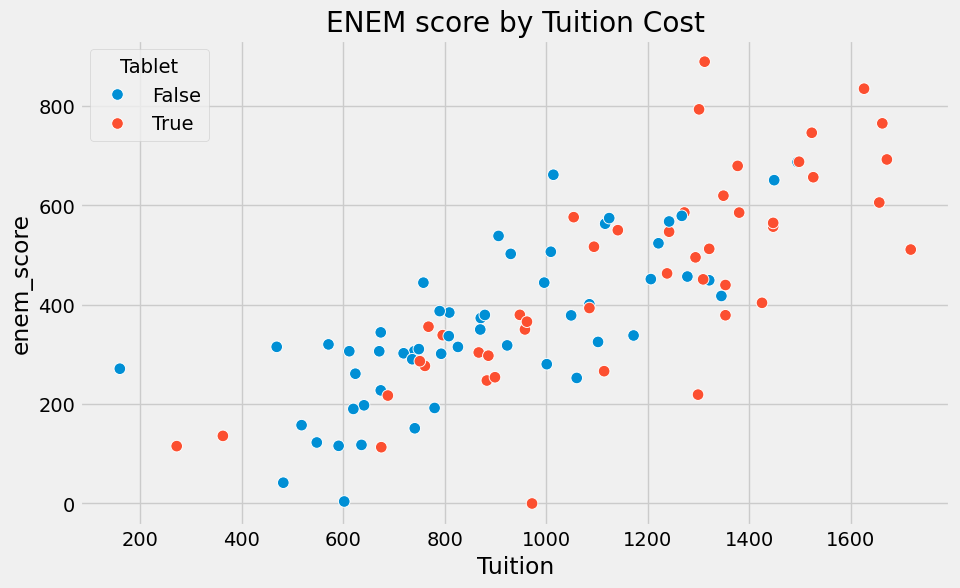

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Tuition", y="enem_score", hue="Tablet", data=data, s=70).set_title('ENEM score by Tuition Cost')
plt.show()

Now that we understand the problem let's look at the solution. We can also say what would be necessary to make association equal to causation. **If $E[Y_0|T=0] = E[Y_0|T=1]$, then, association IS CAUSATION!** Understanding this is not just remembering the equation. There is a strong intuitive argument here. To say that $E[Y_0|T=0] = E[Y_0|T=1]$ is to say that treatment and control group are comparable before the treatment. Or, when the treated had not been treated, if we could observe its $Y_0$, its outcome would be the same as the untreated. Mathematically, the bias term would vanish:

$
E[Y|T=1] - E[Y|T=0] = E[Y_1 - Y_0|T=1] = ATT
$

Also, if the treated and the untreated only differ on the treatment itself, then, $E[Y_0|T=0] = E[Y_0|T=1]$ and we have that the causal impact on the treated is the same as in the untreated (because they are very similar).

$
\begin{align}
E[Y_1 - Y_0|T=1] &= E[Y_1|T=1] - E[Y_0|T=1] \\
&= E[Y_1|T=1] - E[Y_0|T=0] \\
&= E[Y|T=1] - E[Y|T=0]
\end{align}
$

In this case, the **difference in means BECOMES the causal effect**:

$
E[Y|T=1] - E[Y|T=0] = ATT
$

Additionally, if the treated and the untreated only differ on the treatment itself, we also have $E[Y_1|T=0] = E[Y_1|T=1]$, that is, we make sure that both treated and control groups respond similarly to the treatment. Now, besides being exchangeable prior to the treatment, treated and untreated are also exchangeable **after the treatment**. In this case, $E[Y_1 - Y_0|T=1]=E[Y_1 - Y_0|T=0]$ and
 
$
E[Y|T=1] - E[Y|T=0] = ATT = ATE
$

Once again, this is so important that I think it is worth going over it again, now with pretty pictures. If we make a simple average comparison between the treatment and the untreated group, this is what we get (blue dots didn't receive the treatment, that is, the tablet):

![img](./data/img/intro/anatomy1.png)

Notice how the difference in outcomes between the two groups can have two causes:

1. The treatment effect. The increase in test scores is caused by giving kids tablets.
2. Some of the differences in test scores can be due to tuition prices for better education. In this case, treated and untreated differ because the treated have a much higher tuition price. Other differences between the treatment and untreated are NOT the treatment itself. 

The individual treatment effect is the difference between the unit's outcome and another theoretical outcome that the same unit would have if it got the alternative treatment. The actual treatment effect can only be obtained if we have godlike powers to observe the potential outcome, like the left figure below. These are the counterfactual outcomes and are denoted in a light color.

![img](./data/img/intro/anatomy2.png)

In the right plot, we depicted the bias that we’ve talked about before. We get the bias if we set everyone to not receive the treatment. In this case, we are only left with the $T_0$ potential outcome. Then, we see how the treated and untreated groups differ. If they do, something other than the treatment is causing the treated and untreated to be different. This something is the bias and is what shadows the actual treatment effect.

Now, contrast this with a hypothetical situation where there is no bias. Suppose that tablets are randomly assigned to schools. In this situation, rich and poor schools have the same chance of receiving the treatment. Treatment would be well distributed across the tuition spectrum.

![img](./data/img/intro/anatomy3.png)

In this case, the difference in the outcome between treated and untreated IS the average causal effect. This happens because there is no other source of difference between treatment and untreated other than the treatment itself. All the differences we see must be attributed to it. Another way to say this is that there is no bias.

![img](./data/img/intro/anatomy4.png)

If we set everyone to not receive the treatment so that we only observe the $Y_0$s, we would find no difference between the treated and untreated groups. 

This is the herculean task causal inference is all about. It is about finding clever ways of removing bias and making the treated and the untreated comparable so that all the difference we see is only the average treatment effect. Ultimately, causal inference is about figuring out how the world works, stripped of all delusions and misinterpretations. And now that we understand this, we can move forward to mastering some of the most powerful methods to remove bias, the weapons of the Brave and True, to identify the causal effect. 

## Key Ideas

So far, we've seen that association is not causation. Most importantly, we've seen precisely why it isn't and how we can make association be causation. We've also introduced the potential outcome notation as a way to wrap our heads around causal reasoning. With it, we saw statistics as two possible realities: one in which the treatment is given and another in which it is not. But unfortunately, we can only measure one of them, where the fundamental problem of causal inference lies.

We will see some basic techniques to estimate the causal effect, starting with the golden standard of a randomized trial. I'll also review some statistical concepts as we go. I'll end with a quote often used in causal inference classes, taken from a kung-fu series:

> 'What happens in a man's life is already written. A man must move through life as his destiny wills.' -Caine  
'Yes, yet each man is free to live as he chooses. Though they seem opposite, both are true.' -Old Man

## References

I like to think of this book as a tribute to Joshua Angrist, Alberto Abadie and Christopher Walters for their amazing Econometrics class. Most of the ideas here are taken from their classes at the American Economic Association. Watching them is what's keeping me sane during this tough year of 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

I'll also like to reference the amazing books from Angrist. They have shown me that Econometrics, or 'Metrics as they call it, is not only extremely useful but also profoundly fun.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

My final reference is Miguel Hernan and Jamie Robins' book. It has been my trustworthy companion in the most thorny causal questions I had to answer.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

The beer analogy was taken from the awesome [Stock Series](https://jlcollinsnh.com/2012/04/15/stocks-part-1-theres-a-major-market-crash-coming-and-dr-lo-cant-save-you/), by JL Colins. This is an absolute must read for all of those wanting to learn how to productively invest their money.

![img](./data/img/poetry.png)

## Contribute

Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. Its goal is to be accessible monetarily and intellectually. It uses only free software based on Python.
If you found this book valuable and want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits, or giving feedback on passages you didn't understand. Go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it helpful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).